histogram time 0.000939
lpf time 0.000853
local peaks time 0.017329
vectorize time 0.003156
pixels sums time 0.000179
calculate colors time 0.024381
dbscan data size 102 
   db scan time 0.004412
   polynomial fit 0.002381
   polynomial fit 0.003971
extract lines from image time 0.016489
extract lines from image time 0.000395


(array([[ 0.375     ,  0.70647333],
        [ 0.65625   ,  0.35080875]]),
 array([ 0.28125   , -0.35566458]),
 0.45343010106734571)

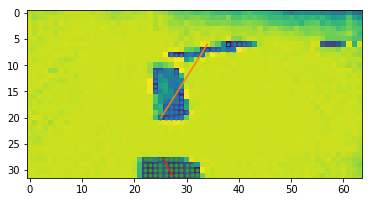

In [73]:
import sys
import numpy as np
from scipy import ndimage
from scipy.misc import imsave
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.signal import argrelextrema
%matplotlib inline

im = ndimage.imread('0000.jpg', mode='L')

im = ndimage.zoom(im[im.shape[0]//3:,:], 0.5)
# im = ndimage.filters.maximum_filter(im, size=(5,5))
plt.imshow(im)

import sensor_camera
import importlib
importlib.reload(sensor_camera)
a = sensor_camera.extract_lines(im, plot=plt)
b = a[0][1] - a[0][0]
a[0], a[0][1] - a[0][0], np.hypot(b[1], b[0])



(array([ 0.47466712,  0.6044388 ]), (30.378695406370781, 19.342041512719405))

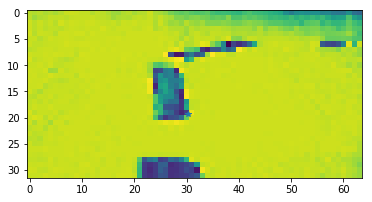

In [72]:
importlib.reload(sensor_camera)
pos = sensor_camera.calculate_direction(a)
plt.imshow(im)
plt.autoscale(False)
c = (pos[0]*im.shape[1], pos[1]*im.shape[0])
plt.plot(c[0], c[1], '*')
pos, c